In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn, optim
from tqdm.notebook import tqdm
from torchvision import transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
%config InlineBackend.figure_format = 'retina'

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

In [3]:
device

device(type='mps')

In [4]:
transform = transforms.Compose(
    [
        transforms.ColorJitter(hue = 0.05, saturation = 0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)

base_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ]
)

In [5]:
cifar_train = torchvision.datasets.CIFAR10(root = './cifar', train = True, download = True, transform = transform)
cifar_test = torchvision.datasets.CIFAR10(root = './cifar', train = False, download = True, transform = base_transform)

train_dataloader = torch.utils.data.DataLoader(cifar_train, batch_size = 40, shuffle = True, num_workers = 4)
test_dataloader = torch.utils.data.DataLoader(cifar_test, batch_size = 40, shuffle = False, num_workers = 4)

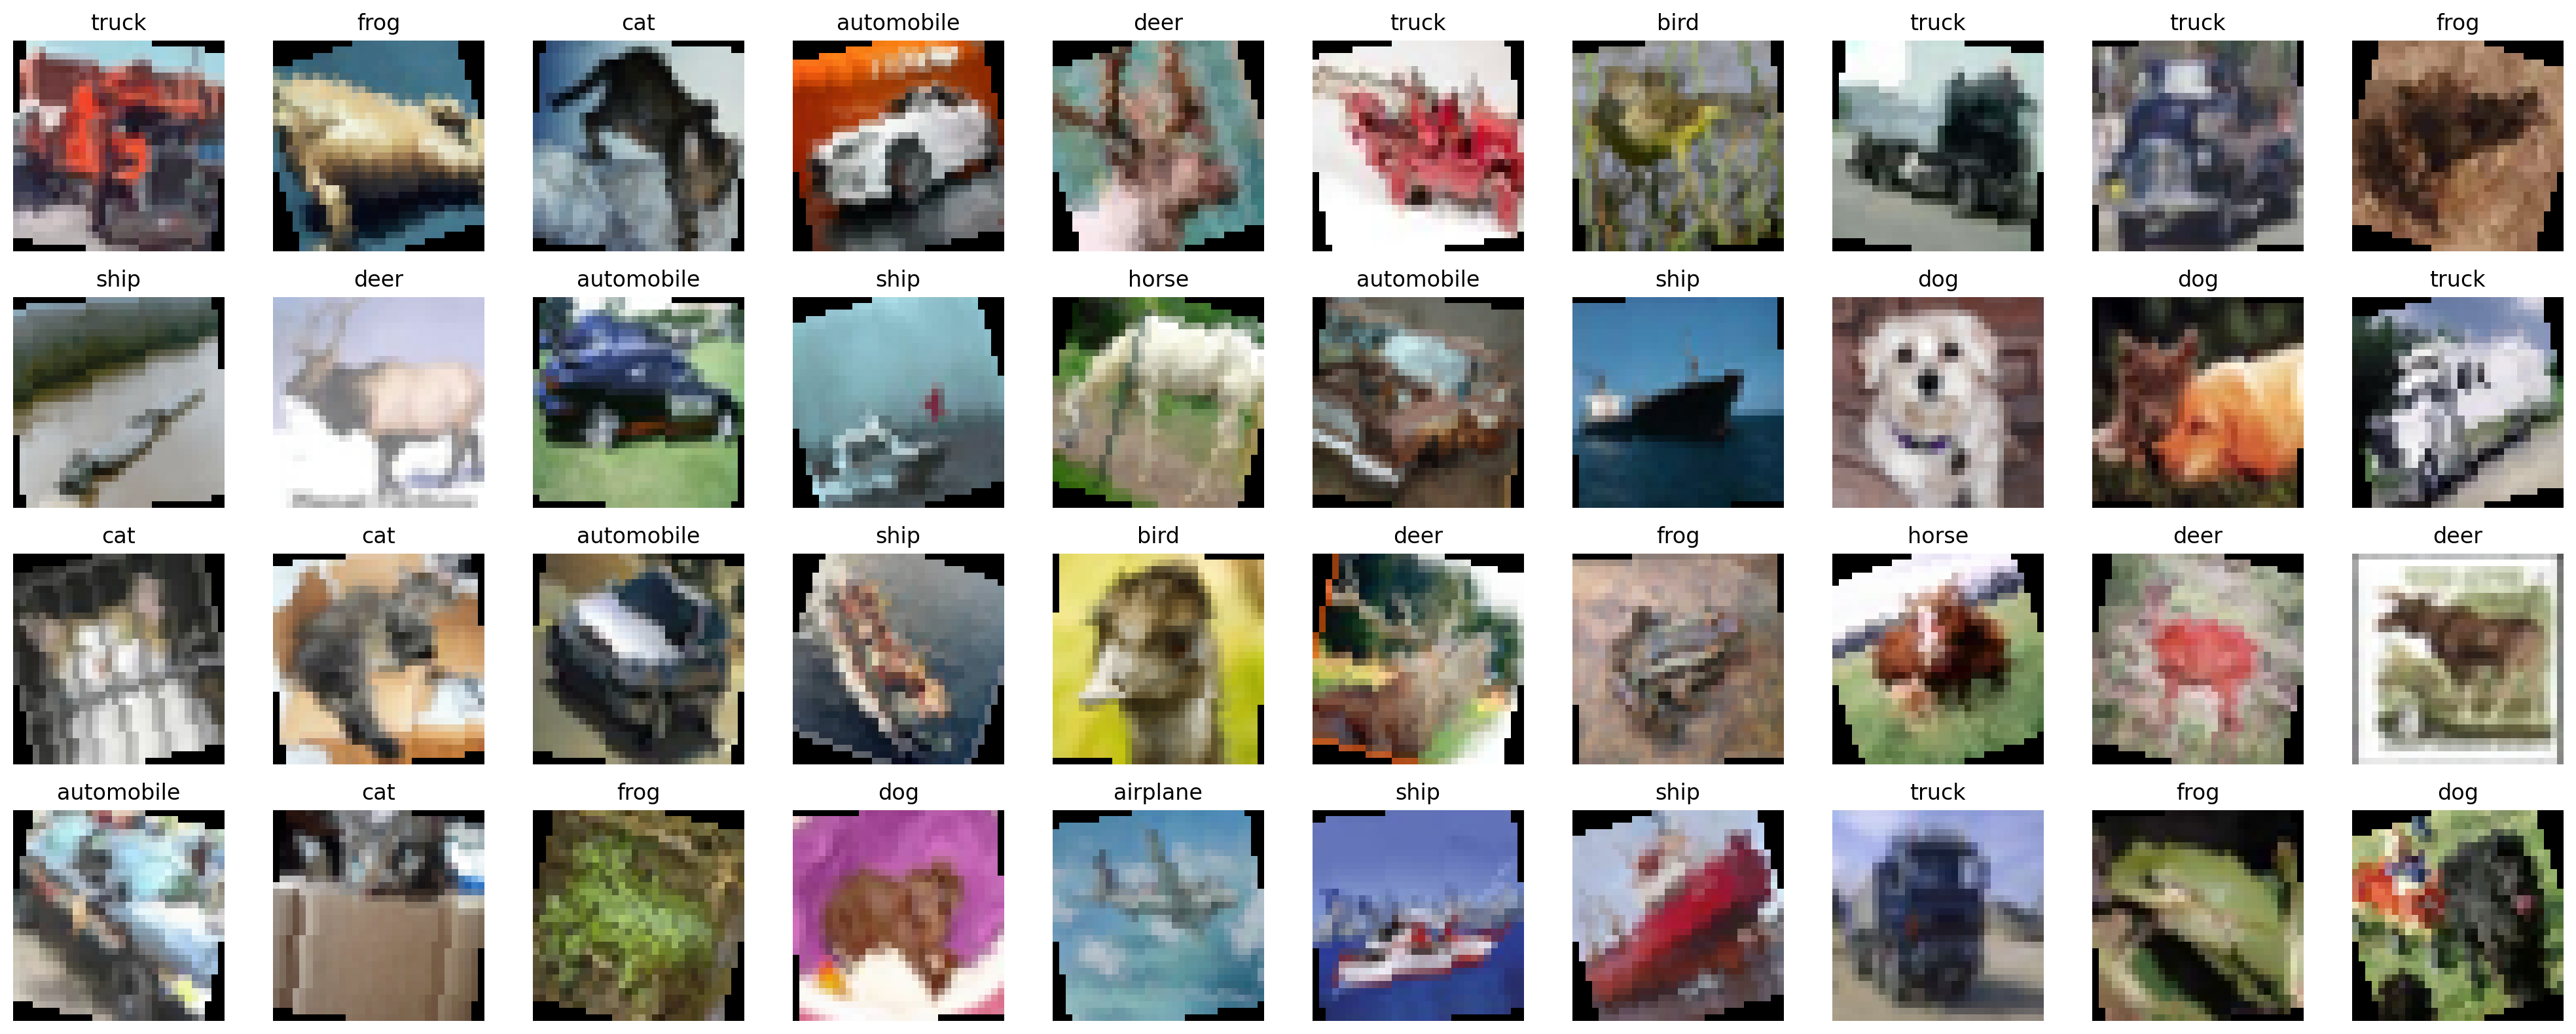

In [6]:
images, labels = next(iter(train_dataloader))
fig, axes = plt.subplots(4, 10, figsize = (20, 8))

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, ax in enumerate(axes.flat):
    img = images[i].permute(1, 2, 0)
    img = img * torch.tensor((0.247, 0.243, 0.261)) + torch.tensor((0.4914, 0.4822, 0.4465))
    img = img.clamp(0, 1)
    ax.imshow(img)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [1]:
class VGG_19(nn.Module):

    def __init__(self):
        super().__init__()

        self.vgg_block1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.vgg_block2 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.vgg_block3 = nn.Sequential(
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.vgg_block4 = nn.Sequential(
            nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.vgg_block5 = nn.Sequential(
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3, padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
 
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 512 * 1 * 1, out_features = 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features = 4096, out_features = 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features = 4096, out_features = 10),
        )


    def forward(self, x):
        x = self.vgg_block1(x)
        x = self.vgg_block2(x)
        x = self.vgg_block3(x)
        x = self.vgg_block4(x)
        x = self.vgg_block5(x)
        x = self.fc_layers(x)
        return x

NameError: name 'nn' is not defined

In [8]:
def train(model, train_dataloader, val_dataloader, optimizer, device, epochs = 10):
    model.to(device)

    val_loss_history = [ ]
    val_acc_history = [ ]

    for epoch in range(epochs):
        model.train()
        for x_train, y_train in tqdm(train_dataloader, desc = f'Epoch {epoch + 1}/{epochs}'):
            y_pred = model(x_train.to(device))
            loss = F.cross_entropy(y_pred, y_train.to(device))

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        if epoch % 2 == 0:
            model.eval()
            val_loss = [ ]
            val_accuracy = [ ]

            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader, desc = 'Validation'):
                    y_pred = model(x_val.to(device))
                    loss = F.cross_entropy(y_pred, y_val.to(device))
                    val_loss.append(loss.item())

                    preds = torch.argmax(y_pred, dim = -1)
                    acc = (preds == y_val.to(device)).float().mean().item()
                    val_accuracy.append(acc)

            mean_loss = np.mean(val_loss)
            mean_acc = np.mean(val_accuracy)

            val_loss_history.append(mean_loss)
            val_acc_history.append(mean_acc)

            print(f'Epoch {epoch + 1}: validation loss = {mean_loss:.4f}, validation accuracy = {mean_acc:.4f}')

    plt.plot(val_loss_history, label = 'Validation Loss', color = 'red')
    plt.plot(val_acc_history, label = 'Validation Accuracy', color = 'green')
    plt.xlabel('Validation step')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

In [9]:
vgg19 = VGG_19().to(device)

In [10]:
optimizer = optim.SGD(vgg19.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
print(f'Training vgg16 model with {sum([x[1].numel() for x in vgg19.named_parameters()])} parameters')
train(vgg19, train_dataloader, test_dataloader, optimizer, device, epochs = 20)

In [ ]:
vgg19_preds = [ ]
vgg19_labels = [ ]

vgg19.eval()
with torch.no_grad():
    for x_val, y_val in test_dataloader:
        x_val, y_val = x_val.to(device), y_val.to(device)
        y_pred = vgg19(x_val)
        preds = torch.argmax(y_pred, dim = -1)
        vgg19_preds.extend(preds.cpu().numpy())
        vgg19_labels.extend(y_val.cpu().numpy())

fig, ax = plt.subplots(figsize = (6, 6))
ConfusionMatrixDisplay.from_predictions(vgg19_labels, vgg19_preds, cmap = plt.cm.Blues, ax = ax, colorbar = False)
plt.show()

In [ ]:
print(classification_report(vgg19_labels, vgg19_preds))

In [ ]:
vgg19.eval()

num_rows = 3
num_cols = 4
num_images = num_rows * num_cols
fig, axes = plt.subplots(num_rows, num_cols * 2, figsize=(3 * num_cols * 2, 3 * num_rows))
images_shown = 0

with torch.no_grad():
    for x_batch, y_batch in test_dataloader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        outputs = vgg19(x_batch)
        probs_batch = F.softmax(outputs, dim = 1)

        for i in range(x_batch.size(0)):
            if images_shown >= num_images:
                break

            x_img = x_batch[i].cpu().permute(1,2,0)
            x_img = x_img * torch.tensor([0.247, 0.243, 0.261]) + torch.tensor([0.4914, 0.4822, 0.4465])
            x_img = x_img.clamp(0,1)

            probs = probs_batch[i].cpu().numpy()
            pred_class = probs.argmax()
            true_class = y_batch[i].item()

            row = images_shown // num_cols
            col = (images_shown % num_cols) * 2

            axes[row, col].imshow(x_img)
            axes[row, col].set_title(f'true: {classes[true_class]}\npred: {classes[pred_class]}')
            axes[row, col].axis('off')

            axes[row, col+1].bar(range(10), probs)
            axes[row, col+1].set_xticks(range(10))
            axes[row, col+1].set_xticklabels(classes, rotation = 90)
            axes[row, col+1].set_ylim(0,1)

            images_shown += 1
        if images_shown >= num_images:
            break

plt.tight_layout()
plt.show()